<a href="https://colab.research.google.com/github/t-umeed/AI-coursework/blob/main/BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ------------------------------------
# Tree Definition
# Structure:
#         A
#        / \
#       B   C
#      / \
#     D   E
# ------------------------------------

class TreeNode:
    def __init__(self, value):
        self.data = value
        self.children = []


nodeA = TreeNode("A")
nodeB = TreeNode("B")
nodeC = TreeNode("C")
nodeD = TreeNode("D")
nodeE = TreeNode("E")


nodeA.children = [nodeB, nodeC]
nodeB.children = [nodeD, nodeE]


tree_root = nodeA

# ------------------------------------
# BFS on Tree
# ------------------------------------
from collections import deque

def bfs_tree(root):
    if not root:
        return

    queue = deque([root])

    while queue:
        current = queue.popleft()
        print(current.data)

        for child in current.children:
            queue.append(child)

# ------------------------------------
# Iterative DFS on Tree (using a stack)
# ------------------------------------
def dfs_tree_iterative(root):
    if not root:
        return

    stack = [root]
    visited = set()

    while stack:
        current = stack.pop()

        if current not in visited:
            visited.add(current)
            print(current.data)


            for child in reversed(current.children):
                stack.append(child)

# ------------------------------------
# Run Tree BFS and DFS
# ------------------------------------
print("BFS on Tree:")
bfs_tree(tree_root)

print("\nDFS on Tree (Iterative):")
dfs_tree_iterative(tree_root)


BFS on Tree:
A
B
C
D
E

DFS on Tree (Iterative):
A
B
D
E
C


In [11]:
# ------------------------------------
# Graph Definition
# Structure:
#       A
#      / \
#     B   C
#      \ /
#       D
# ------------------------------------

graph_data = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

# ------------------------------------
# BFS on Graph
# ------------------------------------
from collections import deque

def bfs_graph(start_node, graph):
    visited = set()          # Set to keep track of visited nodes
    queue = deque([start_node])  # Queue for BFS, starting with the start_node

    while queue:
        current = queue.popleft()  # Get the first node from the queue

        if current not in visited:  # If the node hasn't been visited yet
            print(current)          # Visit the node (print it)
            visited.add(current)     # Mark the node as visited

            # Add unvisited neighbors to the queue
            for neighbor in graph[current]:
                if neighbor not in visited:
                    queue.append(neighbor)

# ------------------------------------
# Iterative DFS on Graph (using stack)
# ------------------------------------
def dfs_graph_iterative(start_node, graph):
    visited = set()
    stack = [start_node]

    while stack:
        current = stack.pop()

        if current not in visited:
            print(current)
            visited.add(current)


            for neighbor in reversed(graph[current]):
                if neighbor not in visited:
                    stack.append(neighbor)

# ------------------------------------
# Run Graph BFS and DFS
# ------------------------------------
print("\nBFS on Graph:")
bfs_graph('A', graph_data)

print("\nDFS on Graph (Iterative):")
dfs_graph_iterative('A', graph_data)



BFS on Graph:
A
B
C
D

DFS on Graph (Iterative):
A
B
D
C


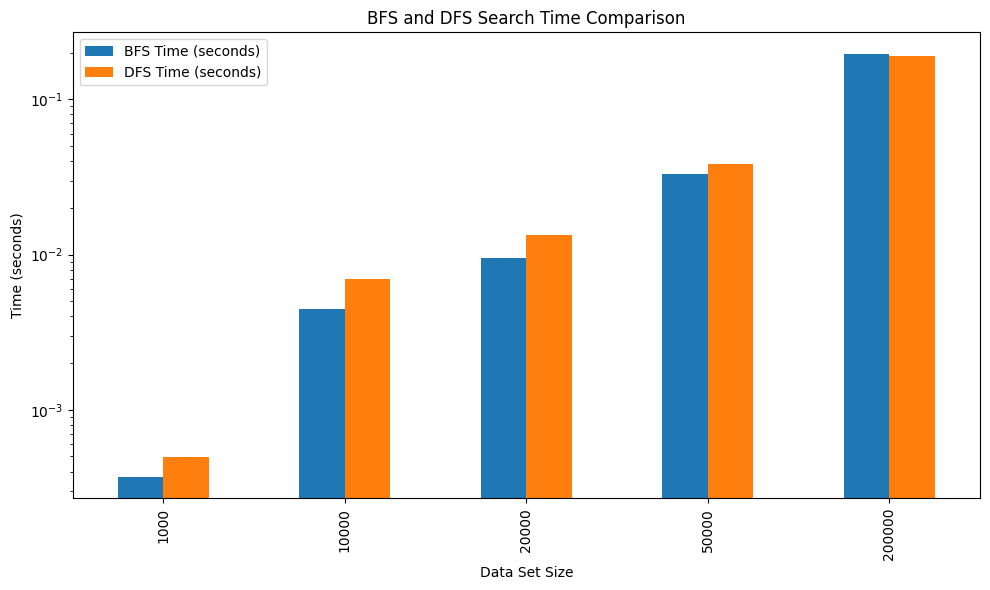

   Data Set Size  BFS Time (seconds)  DFS Time (seconds)
0           1000            0.000369            0.000494
1          10000            0.004442            0.006911
2          20000            0.009486            0.013284
3          50000            0.033276            0.038601
4         200000            0.197552            0.190301


In [12]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque


# Generate a list of random numbers
def generate_numbers(range_min, range_max, num_count):
    return random.sample(range(range_min, range_max), num_count)


# Breadth-First Search (BFS)
def bfs(tree, goal):
    queue = deque([tree])
    while queue:
        node = queue.popleft()
        if node == goal:
            return True
        if isinstance(node, list):
            queue.extend(node)
    return False


# Depth-First Search (DFS)
def dfs(tree, goal):
    stack = [tree]
    while stack:
        node = stack.pop()
        if node == goal:
            return True
        if isinstance(node, list):
            # Add children in reverse order so left child is processed first
            stack.extend(reversed(node))
    return False


# Build a binary tree from a list
def build_tree(num_list):
    if len(num_list) <= 1:
        return num_list[0] if num_list else None
    mid = len(num_list) // 2
    return [build_tree(num_list[:mid]), build_tree(num_list[mid:])]


# Main function to analyze and compare BFS vs DFS
def analyze_search_times():
    ranges = [(1000, 1000), (40000, 10000), (80000, 20000), (200000, 50000), (1000000, 200000)]
    search_results = []

    for range_max, num_count in ranges:
        num_list = generate_numbers(0, range_max, num_count)
        tree = build_tree(num_list)
        goal = num_list[-220]

        # Measure BFS time
        start_time = time.time()
        bfs_result = bfs(tree, goal)
        bfs_time = time.time() - start_time

        # Measure DFS time
        start_time = time.time()
        dfs_result = dfs(tree, goal)
        dfs_time = time.time() - start_time

        # Save results
        search_results.append({
            "Data Set Size": num_count,
            "BFS Time (seconds)": bfs_time,
            "DFS Time (seconds)": dfs_time
        })

    # Create DataFrame from results
    df = pd.DataFrame(search_results)

    # Plot bar chart with log scale for better visibility
    ax = df.plot(
        x="Data Set Size",
        y=["BFS Time (seconds)", "DFS Time (seconds)"],
        kind="bar",
        figsize=(10, 6)
    )

    plt.title("BFS and DFS Search Time Comparison")
    plt.xlabel("Data Set Size")
    plt.ylabel("Time (seconds)")
    plt.yscale("log")  # <-- Add logarithmic scale to show both small and large times
    plt.tight_layout()
    plt.show()

    return df


# Run and display the results
result_df = analyze_search_times()
print(result_df)


In [13]:
from collections import deque


def bfs_shortest_path(graph, start, target):

    queue = deque([[start]])
    visited = set()


    while queue:
        path = queue.popleft()

        city = path[-1]

        if city == target:
            return path


        if city not in visited:
            visited.add(city)
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

    return None

# Represent the cities and their connections as a graph (adjacency list)
graph = {
    "Islamabad": ["Rawalpindi", "Lahore", "Peshawar"],
    "Rawalpindi": ["Islamabad", "Peshawar", "Quetta"],
    "Peshawar": ["Islamabad", "Rawalpindi", "Quetta"],
    "Lahore": ["Islamabad", "Multan", "Quetta"],
    "Multan": ["Lahore", "Karachi", "Quetta"],
    "Quetta": ["Rawalpindi", "Peshawar", "Multan", "Karachi"],
    "Karachi": ["Multan", "Quetta"]
}


start_city = "Peshawar"
target_city = "Karachi"


shortest_path = bfs_shortest_path(graph, start_city, target_city)


if shortest_path:
    print(f"The shortest path from {start_city} to {target_city} is: {' -> '.join(shortest_path)}")
else:
    print(f"No path found from {start_city} to {target_city}.")


The shortest path from Peshawar to Karachi is: Peshawar -> Quetta -> Karachi
